# aapineda

# River Flow Forecasting: A Hybrid Approach Integrating Machine Learning and Linear Time Series Models

![Alt text](1024px-Rio_Magdalena_Delta_landsat.jpg)

## **Resumen**


La precisa estimación del caudal del río Magdalena en la estación de Calamar, Bolívar, es esencial para la gestión de recursos hídricos y la reducción de riesgos de inundaciones en esta región. En este estudio, se emplearon tres enfoques de modelado para estimar el caudal del río a largo plazo (mensuales).
Los datos necesarios para este análisis fueron recopilados específicamente en la estación de monitoreo de Calamar, Bolívar, a lo largo del río Magdalena. Se examinaron tres enfoques de modelado: modelos autoregresivos (AR), modelos de promedio móvil (MA) y modelos autoregresivos de promedio móvil (ARMA). Los resultados revelaron que los modelos MA superaron consistentemente en rendimiento a los modelos AR y ARMA.
Además, para mejorar la precisión en la estimación del caudal del río Magdalena, se exploraron modelos de aprendizaje automático. Específicamente, se utilizaron Bosques Aleatorios (RF) y Splines de Regresión Adaptativos Multivariados (MARS) para estimar los valores mensuales de un factor crítico, el caudal del Rio, basándose en datos del Caudal del periodo anterior. Los resultados revelaron que RF y MARS produjeron estimaciones comparables, con RF mostrando una ligera ventaja en el rendimiento.
Posteriormente, se implementaron modelos híbridos que combinaron enfoques de series temporales y aprendizaje automático, como RF-AR, RF-MA, RF-ARMA, MARS-AR, MARS-MA y MARS-ARMA, con el objetivo de mejorar la precisión en la estimación del Caudal. Entre estos modelos híbridos, RF-AR y MARS-AR demostraron consistentemente un rendimiento sobresaliente.
Los resultados de este estudio sugieren que la combinación de enfoques híbridos, que integran modelos de series temporales y aprendizaje automático, ofrece un enfoque prometedor para estimar el Caudal en la estación de Calamar, Bolívar, a lo largo del río Magdalena. Estas estimaciones precisas del Caudal tienen aplicaciones significativas en proyectos relacionados con el analisis de Riesgo, planificacion de dragados y Energia hidroelectrica.

* Palabras clave: Río Magdalena · Estimación · Modelos de Series Temporales · Modelos de Aprendizaje Automático · Modelos Independientes y Híbridos · Caudales.

## **Metodología**

**Población y Muestra:**
- Población: La población de interés consistió en todos los datos históricos de caudales disponibles para la estación de Calamar, Bolívar, a lo largo del río Magdalena. (1984-2020)
- Muestra: La muestra se seleccionó considerando el tiempo y el espacio, incluyendo datos diarios recopilados a lo largo de varios años específicos. La muestra se limitó a la estación de Calamar, Bolívar.

**Variables:**
Se definió un diccionario de características que incluyó las siguientes variables:
- Caudal del río Magdalena (variable objetivo).
- Variables meteorológicas adicionales (si es necesario).
- Fechas y marcas temporales para el análisis de series temporales.

**Técnicas:**
Se emplearon diversas técnicas para la estimación del caudal del río Magdalena, que se dividieron en dos categorías principales:

**a. Modelos de Series Temporales:**
- Modelos AR (Autoregresivos).
- Modelos MA (Promedio Móvil).
- Modelos ARMA (Autoregresivos de Promedio Móvil).

**b. Modelos de Aprendizaje Automático:**
- Bosques Aleatorios (RF).
- Splines de Regresión Adaptativos Multivariados (MARS).
Además, se aplicaron modelos híbridos que combinaron enfoques de series temporales y aprendizaje automático, como RF-AR y MARS-AR.

**Diseño General:**
El estudio siguió un diseño de investigación observacional retrospectiva. Se recopilaron datos históricos de caudales del río Magdalena en la estación de Calamar, Bolívar, así como datos de velocidad del viento y, en su caso, datos meteorológicos adicionales. Estos datos retrospectivos se analizaron para desarrollar modelos de estimación del caudal del río.

**Validez:**
La validez del estudio se abordó de la siguiente manera:
- Grupos de Datos Coherentes: Se utilizaron datos coherentes y homogéneos recopilados de manera consistente a lo largo del tiempo.
- Automatizado: La obtención de datos se automatizó mediante la extracción de datos desde fuentes como archivos CSV y, en su caso, API o consultas SQL.
- Técnicas Estadísticas: Se aplicaron pruebas estadísticas como Chi cuadrado, T-Students, Prueba Fisher y análisis de autocorrelación para evaluar la validez y la robustez de los modelos propuestos y los resultados del estudio.

Este enfoque metodológico riguroso garantiza la calidad y la confiabilidad de los resultados del estudio de estimación del caudal del río Magdalena en la estación de Calamar, Bolívar, y sienta las bases para la mejora de la gestión de recursos hídricos en esta región.







![Alt text](image-1.png)
Fuente: Wikipedia

## Librerias Necesarias

In [271]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from tensorflow import keras

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

## Errores
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Dataset

In [272]:
import pandas as pd

# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_29037020.csv' ##CALAMAR
#url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_21237020.csv'
#url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_25027020.csv'



# Leer el archivo CSV desde la URL
df = pd.read_csv(url)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13515 entries, 0 to 13514
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13515 non-null  object 
 1   Flow    13515 non-null  float64
 2   ENSO    13515 non-null  float64
dtypes: float64(2), object(1)
memory usage: 316.9+ KB


In [274]:
df['Flow'].interpolate(method='linear', inplace=True)

In [275]:
df.head()

,Date,Flow,ENSO
0,1-01-1984,7803.0,-0.6
1,2-01-1984,7718.0,-0.6
2,3-01-1984,7634.0,-0.6
3,4-01-1984,7554.0,-0.6
4,5-01-1984,7498.0,-0.6


In [276]:
df.describe()

,Flow,ENSO
count,13515.000000,13515.000000
mean,7239.553703,-0.003492
std,2708.667922,0.850624
min,2011.900000,-1.800000
25%,5177.200000,-0.600000
50%,6987.000000,-0.100000
75%,9157.050000,0.500000
max,14909.000000,2.600000


In [277]:
df.isnull().sum()

Date    0
Flow    0
ENSO    0
dtype: int64

In [278]:
(df.isnull().sum()/(len(df)))*100

Date    0.0
Flow    0.0
ENSO    0.0
dtype: float64

In [279]:

# Asegúrate de que la columna 'fecha' sea de tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')


# Agrupa los datos por mes y calcula el promedio
serie = df.groupby(df['Date'].dt.to_period('M')).mean()
#serie = df

serie = serie.reset_index(drop=True)

# La variable promedio_por_mes ahora contiene el promedio de 'valor' por mes
print(serie)

             Flow  ENSO
0     7046.387097  -0.6
1     5769.344828  -0.4
2     5016.483871  -0.3
3     4613.266667  -0.4
4     6783.838710  -0.5
..            ...   ...
439   7277.535484  -0.6
440   8679.066667  -0.9
441   9349.567742  -1.2
442   9804.350000  -1.3
443  10353.732258  -1.2

[444 rows x 2 columns]


In [280]:
serie

,Flow,ENSO
0,7046.387097,-0.6
1,5769.344828,-0.4
2,5016.483871,-0.3
3,4613.266667,-0.4
4,6783.838710,-0.5
...,...,...
439,7277.535484,-0.6
440,8679.066667,-0.9
441,9349.567742,-1.2
442,9804.350000,-1.3


In [281]:
serie['Mes'] = range(1, len(serie) + 1) #PREDECIR CON MESES
#serie = serie.drop(columns='Date')

In [282]:
serie

,Flow,ENSO,Mes
0,7046.387097,-0.6,1
1,5769.344828,-0.4,2
2,5016.483871,-0.3,3
3,4613.266667,-0.4,4
4,6783.838710,-0.5,5
...,...,...,...
439,7277.535484,-0.6,440
440,8679.066667,-0.9,441
441,9349.567742,-1.2,442
442,9804.350000,-1.3,443


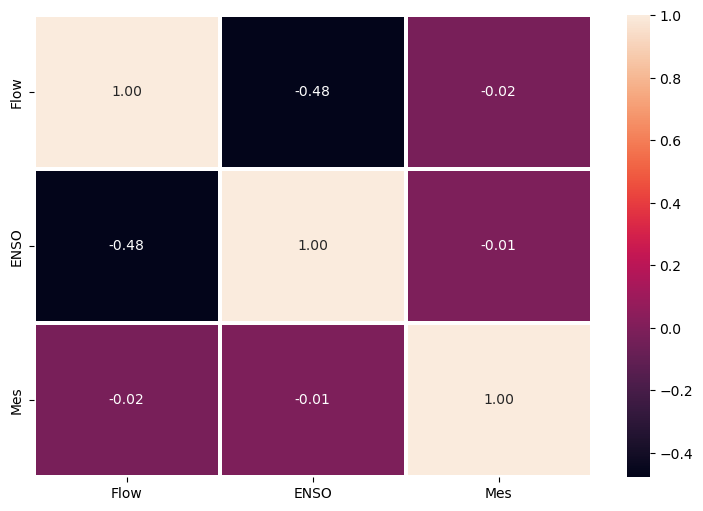

In [283]:
corr = serie.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

### Relacion entre ENSO y Caudal

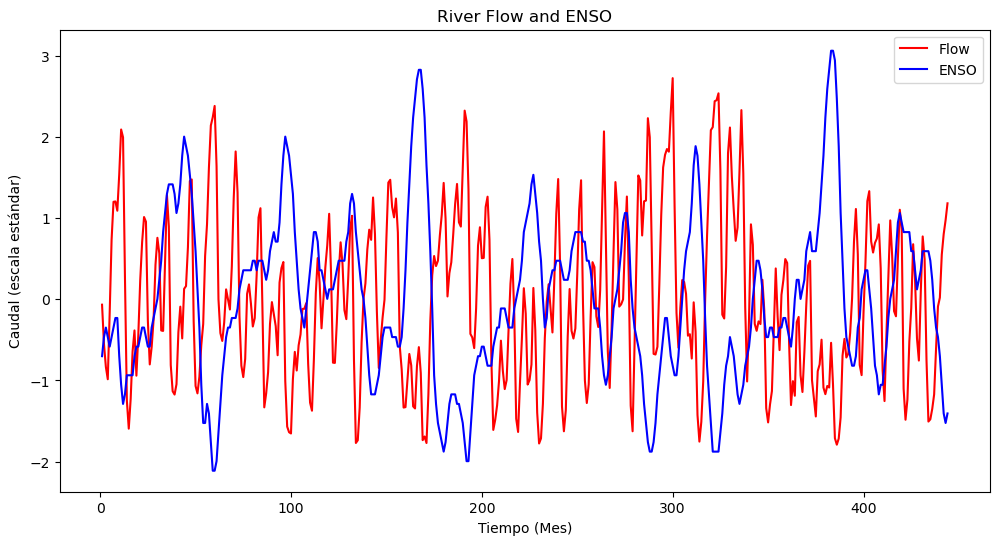

In [284]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # Importa StandardScaler desde sklearn.preprocessing si no está ya importado

# Escala las series 'Flow' y 'ENSO' usando StandardScaler
scaler = StandardScaler()
scaled_flow = scaler.fit_transform(serie[['Flow']])
scaled_enso = scaler.fit_transform(serie[['ENSO']])

# Crea una figura y traza las series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(serie['Mes'], scaled_flow, color='red', label='Flow')
ax.plot(serie['Mes'], scaled_enso, color='blue', label='ENSO')  # Usamos un color diferente (azul) para ENSO
ax.set_xlabel('Tiempo (Mes)')
ax.set_ylabel('Caudal (escala estándar)')
ax.legend()
ax.set_title('River Flow and ENSO')
ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels for readability
plt.show()


#### Lag a los datos

In [285]:
serie['Flow_lag'] = serie['Flow'].shift(1)
serie['ENSO_lag'] = serie['ENSO'].shift(1)

In [286]:
serie

,Flow,ENSO,Mes,Flow_lag,ENSO_lag
0,7046.387097,-0.6,1,NaN,NaN
1,5769.344828,-0.4,2,7046.387097,-0.6
2,5016.483871,-0.3,3,5769.344828,-0.4
3,4613.266667,-0.4,4,5016.483871,-0.3
4,6783.838710,-0.5,5,4613.266667,-0.4
...,...,...,...,...,...
439,7277.535484,-0.6,440,6987.390323,-0.4
440,8679.066667,-0.9,441,7277.535484,-0.6
441,9349.567742,-1.2,442,8679.066667,-0.9
442,9804.350000,-1.3,443,9349.567742,-1.2


In [287]:
serie.at[0, 'Flow_lag'] = 7490.387
#serie.at[0, 'ENSO_lag'] = -0.8
#serie.at[1, 'ENSO_lag'] = -1
serie.at[0, 'ENSO_lag'] = -0.9



In [288]:
serie

,Flow,ENSO,Mes,Flow_lag,ENSO_lag
0,7046.387097,-0.6,1,7490.387000,-0.9
1,5769.344828,-0.4,2,7046.387097,-0.6
2,5016.483871,-0.3,3,5769.344828,-0.4
3,4613.266667,-0.4,4,5016.483871,-0.3
4,6783.838710,-0.5,5,4613.266667,-0.4
...,...,...,...,...,...
439,7277.535484,-0.6,440,6987.390323,-0.4
440,8679.066667,-0.9,441,7277.535484,-0.6
441,9349.567742,-1.2,442,8679.066667,-0.9
442,9804.350000,-1.3,443,9349.567742,-1.2


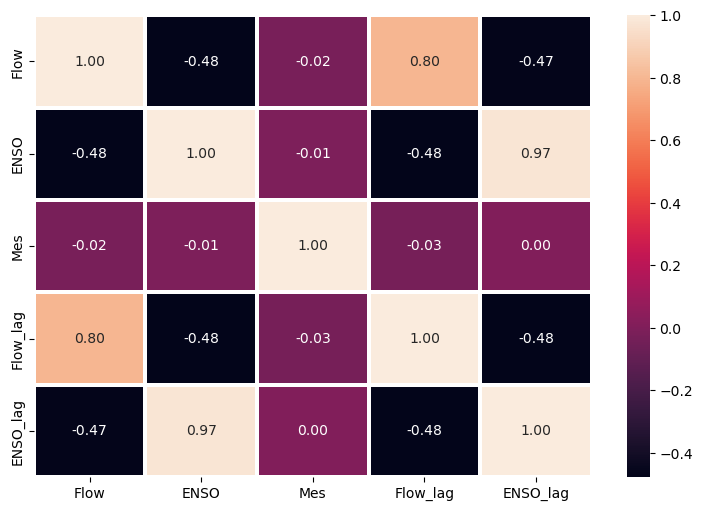

In [289]:
corr = serie.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [290]:
serie_ARIMA= serie[['Flow', 'Mes']].copy()


In [291]:
serie_ARIMA

,Flow,Mes
0,7046.387097,1
1,5769.344828,2
2,5016.483871,3
3,4613.266667,4
4,6783.838710,5
...,...,...
439,7277.535484,440
440,8679.066667,441
441,9349.567742,442
442,9804.350000,443


### Auto Correlation function (ACF) and Partial Autocorrelation Funcion(PACF).

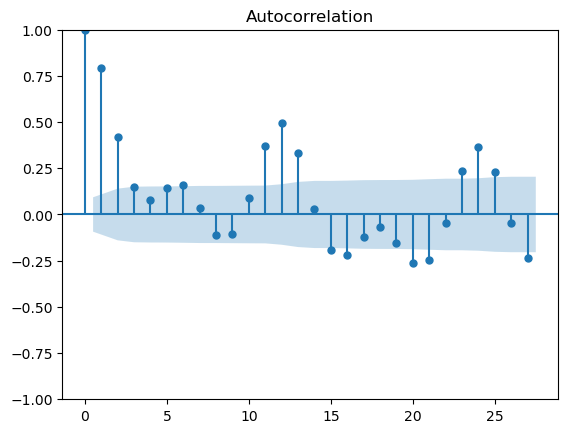

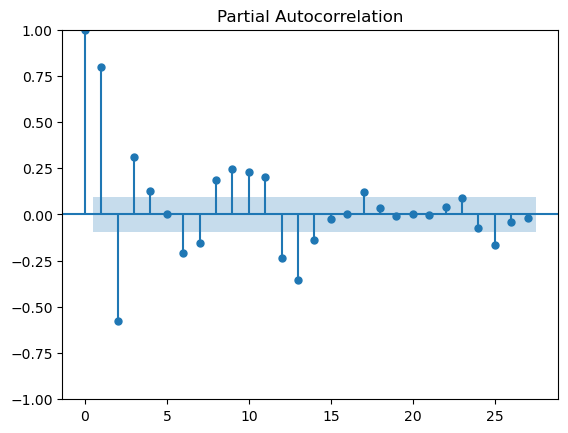

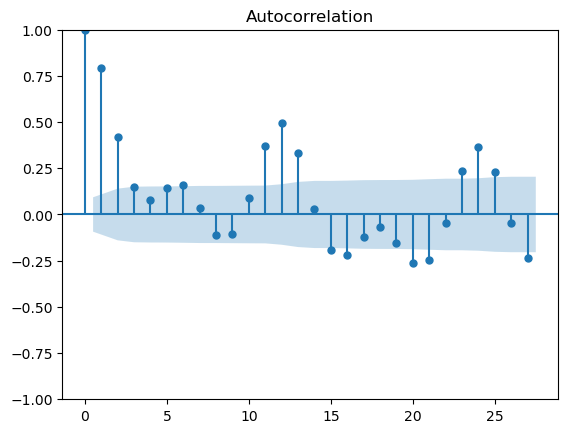

In [292]:
plot_pacf(serie_ARIMA['Flow'])
plot_acf(serie_ARIMA['Flow'])

In [293]:
#Function to know stacionality

def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios (Stationary)")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos son no estacionarios (Non Stationary)")

In [294]:
Prueba_Dickey_Fuller(serie_ARIMA['Flow'],"Flow")

Resultados de la prueba de Dickey-Fuller para columna: Flow
Test Statistic                         -5.555584
p-value                                 0.000002
No Lags Used                           13.000000
Número de observaciones utilizadas    430.000000
Critical Value (1%)                    -3.445649
Critical Value (5%)                    -2.868285
Critical Value (10%)                   -2.570363
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios (Stationary)


In [295]:
# Convertir 'Flow' y 'Mes' en arreglos NumPy y luego aplicar reshape
"""target = serie['Flow'].values.reshape(-1, 1)
data = serie['Mes'].values.reshape(-1, 1)"""

"target = serie['Flow'].values.reshape(-1, 1)\ndata = serie['Mes'].values.reshape(-1, 1)"

### Datos de Entrenamiento y Prueba

In [296]:
size = int(len(serie) * 0.8)

In [297]:
data_train = serie[serie.Mes <= size]
data_test  = serie[serie.Mes > size]

In [298]:
#X_train = np.array(data_train.Mes)[:, None] # vector-columna

#X_train = np.array(data_train[['Mes', 'ENSO']])
#X_train = np.array(data_train[['Flow_lag']])
X_train = np.array(data_train[['Flow_lag', 'ENSO_lag']])

y_train = np.array(data_train.Flow)

#X_test = np.array(data_test.Mes)[:, None] # vector-columna
X_test = np.array(data_test[['Flow_lag', 'ENSO_lag']])
y_test = np.array(data_test.Flow)

X_all = np.array(serie[['Flow_lag', 'ENSO_lag']])


In [299]:
len(y_test)

89

## Metricas

In [300]:
# Calculo de Metricas
def metricas(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    # Calcular el RRMSE directamente
    rrmse = np.sqrt(np.mean((y_test - y_pred) ** 2)) / np.mean(y_test)
    print(f"RRMSE: {rrmse:.2f}")

    # Calcular R-squared
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R^2): {r2:.2f}")

    # Calcular el NSE (coeficiente de eficiencia Nash-Sutcliffe)
    nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
    print(f"NSE (Nash-Sutcliffe Efficiency): {nse:.2f}")


## ARIMA

In [301]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# Load dataset

# Split into train and test sets
X = serie_ARIMA['Flow'].values
train, test = X[:size], X[size:]



## Funcion ARIMA

In [302]:

def ARIMA_estimador(serie_ARIMA, orden):
    # Split into train and test sets
    predictions = []
    residuales = []
    X = serie_ARIMA['Flow'].values
    size = int(len(X) * 0.8)
    train, test = X[:size], X[size:]

    history = [x for x in train]
    
    # Walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=orden)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('Month=%s, Predicted=%f, Expected=%f' % (serie_ARIMA['Mes'].iloc[size + t], yhat, obs))

    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=orden)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        residuales.append(obs-yhat)

    fig = plt.figure(figsize=(12, 6))
    plt.plot(serie_ARIMA['Mes'].iloc[size:], test, marker='o', linestyle='', label='Actual')
    plt.plot(serie_ARIMA['Mes'].iloc[size:], predictions, color='red', label='Predicted')
    plt.xlabel('Tiempo (Mes)')
    plt.ylabel('Caudal (m3/s)')
    plt.legend()
    plt.title('River Flow Forecast')
    plt.xticks(rotation=0)
    plt.show()


    # Evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)

    # Plot forecasts against actual outcomes
    fig = plt.figure(figsize=(12, 6))
    plt.plot(serie_ARIMA['Mes'].iloc[size:], residuales, color='red', label='Residuales')
    plt.xlabel('Tiempo (Mes)')
    plt.ylabel('Caudal (m3/s)')
    plt.legend()
    plt.title('Residuales obtenidos')
    plt.xticks(rotation=0)  # Rotate x-axis labels for readability
    plt.show()
    
    
    return predictions, residuales


## Modelos lineales
Entre los modelos lineales se encuentran: autoregressive (AR), moving average (MA), and autoregressive moving average (ARMA)

### AR

In [303]:
import pmdarima as pm

model_1 = pm.auto_arima(X, start_p=1, start_q=0,
                      test='adf',
                      max_p=5, max_q=0,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7865.329, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9208.012, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7777.791, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7662.598, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=7641.101, Time=0.08 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=7639.764, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=7603.639, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=7601.648, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=7606.573, Time=0.04 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0] intercept
Total fit time: 0.438 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -3794.824
Date:                Wed, 04 Oct 2023   AIC      

* Se ajusta el orden de AR.

In [304]:
orden_ar=(5, 0, 0) 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  355
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -3036.744
Date:                Wed, 04 Oct 2023   AIC                           6087.488
Time:                        18:37:26   BIC                           6114.593
Sample:                             0   HQIC                          6098.271
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7413.0301    367.764     20.157      0.000    6692.227    8133.834
ar.L1          1.4205      0.057     24.728      0.000       1.308       1.533
ar.L2         -0.8886      0.095     -9.400      0.0

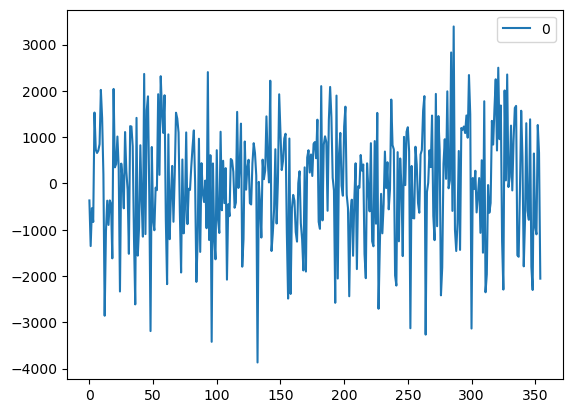

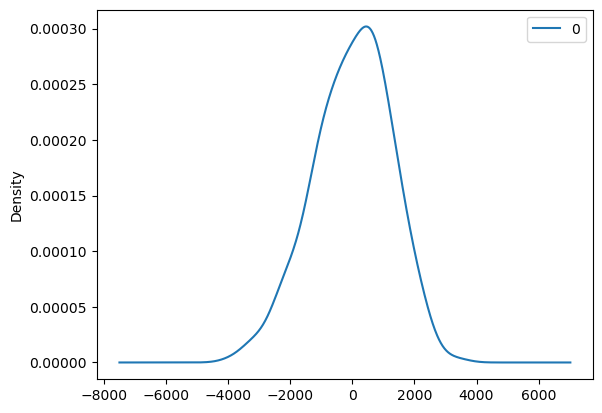

                 0
count   355.000000
mean     -5.996724
std    1254.328712
min   -3866.216294
25%    -843.690612
50%      66.530667
75%     869.953976
max    3390.829384


In [305]:
# fit model
model = ARIMA(train, order=orden_ar)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

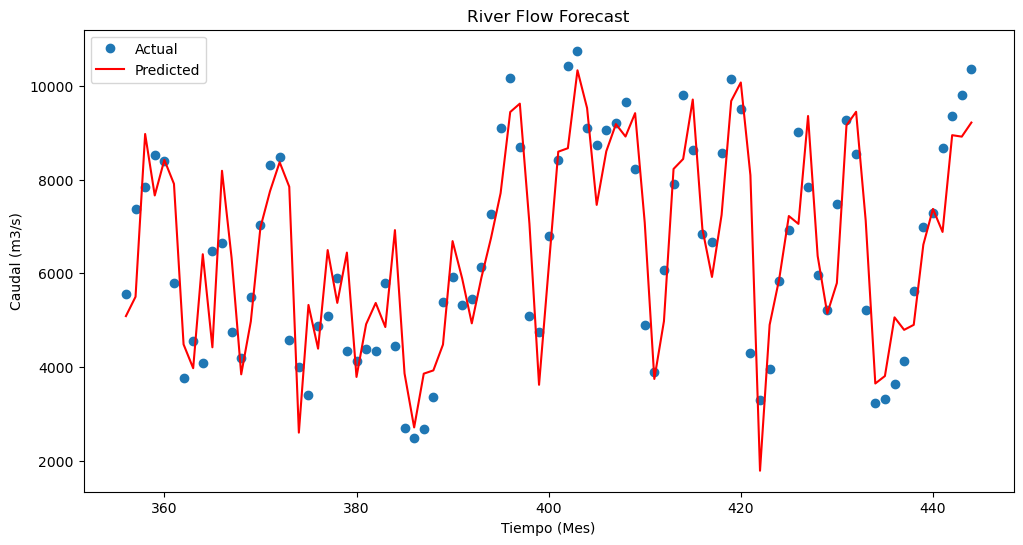

Test RMSE: 1216.840


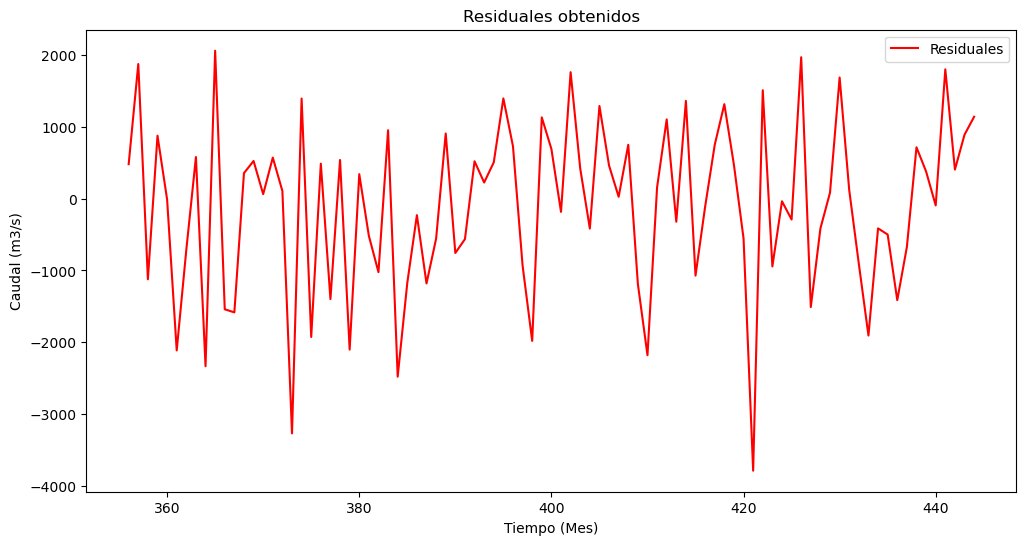

In [306]:
predictions = []
residuales = []

predictions_AR, residuales_AR = ARIMA_estimador(serie_ARIMA, orden_ar)

In [307]:
metricas(y_test, predictions_AR)

RMSE: 1216.84
MAE: 968.17
RRMSE: 0.19
R-squared (R^2): 0.70
NSE (Nash-Sutcliffe Efficiency): 0.70


### ARMA

In [308]:
import pmdarima as pm

model_1 = pm.auto_arima(X, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7727.800, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9208.012, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7865.329, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7724.921, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7777.791, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7640.387, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7662.598, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=7641.410, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7604.934, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=7555.354, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=7557.681, T

In [309]:
orden_arma=(4, 0, 5)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  355
Model:                 ARIMA(4, 0, 5)   Log Likelihood               -2995.301
Date:                Wed, 04 Oct 2023   AIC                           6012.602
Time:                        18:37:52   BIC                           6055.196
Sample:                             0   HQIC                          6029.547
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7413.0299    355.870     20.831      0.000    6715.537    8110.523
ar.L1          0.7218      0.092      7.853      0.000       0.542       0.902
ar.L2         -0.0133      0.130     -0.102      0.9

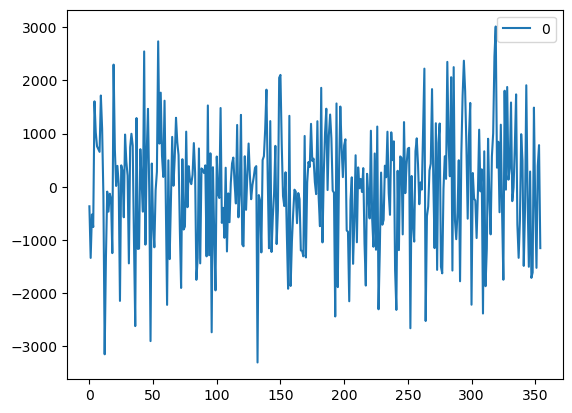

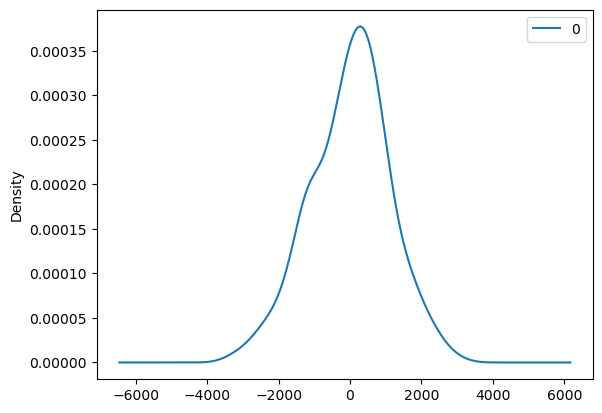

                 0
count   355.000000
mean     -4.507657
std    1113.250244
min   -3301.730544
25%    -712.586706
50%      88.607167
75%     726.392783
max    3012.873611


In [310]:
# fit model
model = ARIMA(train, order=orden_arma)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [311]:
serie_ARIMA

,Flow,Mes
0,7046.387097,1
1,5769.344828,2
2,5016.483871,3
3,4613.266667,4
4,6783.838710,5
...,...,...
439,7277.535484,440
440,8679.066667,441
441,9349.567742,442
442,9804.350000,443


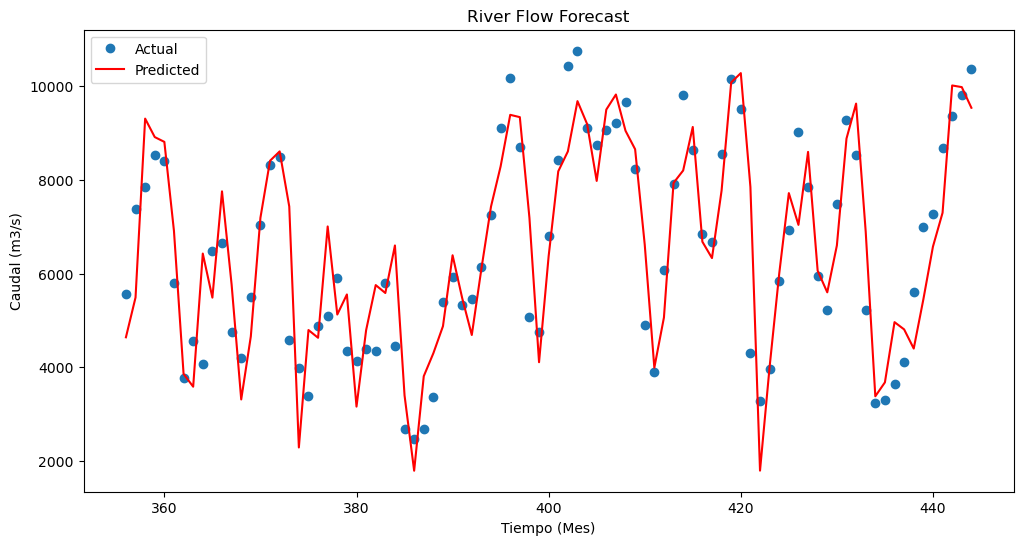

Test RMSE: 1090.089


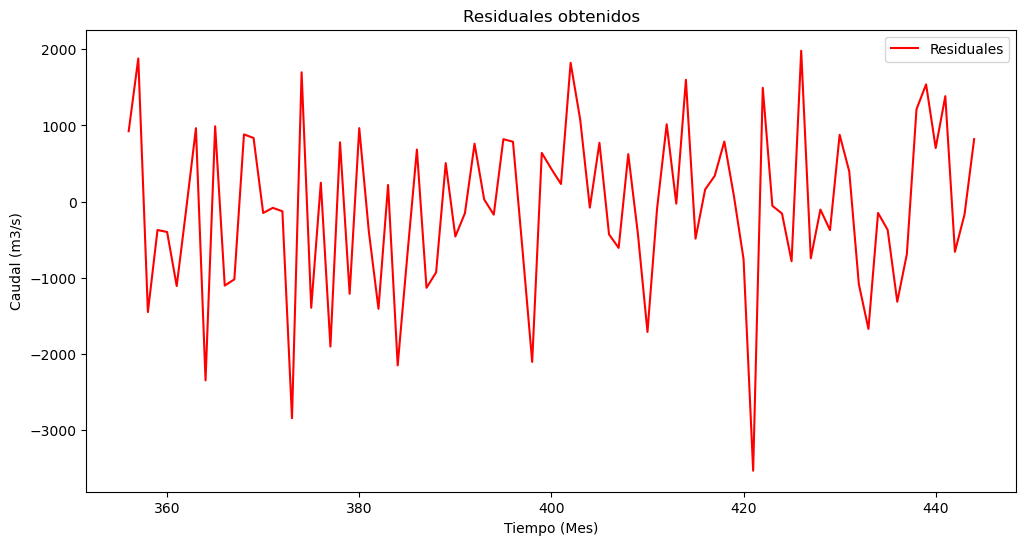

In [312]:
predictions_ARMA, residuales_ARMA = ARIMA_estimador(serie_ARIMA, orden_arma)

In [313]:
metricas(y_test, predictions_ARMA)

RMSE: 1090.09
MAE: 857.68
RRMSE: 0.17
R-squared (R^2): 0.76
NSE (Nash-Sutcliffe Efficiency): 0.76


## Ridge

In [314]:
from sklearn.linear_model import Ridge

alpha_values = np.logspace(-1, 1, 100)  # Generates values from 1e-6 to 1e6 with 13 points

# Definir el conjunto de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'ridge__alpha': alpha_values,
}

# Crear el pipeline con MinMaxScaler y Ridge
pipe = make_pipeline(MinMaxScaler(), Ridge())

# Realizar la búsqueda en cuadrícula
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 1

In [315]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridge', Ridge(alpha=0.30538555088334157))])


In [316]:
y_pred = grid.predict(X_test)
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

# Calculo de Metricas

metricas(y_test, y_pred)

Training-set score: 0.64
Test-set score: 0.59
RMSE: 1422.57
MAE: 1131.05
RRMSE: 0.22
R-squared (R^2): 0.59
NSE (Nash-Sutcliffe Efficiency): 0.59


## Lasso

In [317]:
from sklearn.linear_model import Lasso

alpha_values = np.logspace(-1, 1, 100)  # Generates values from 1e-6 to 1e6 with 13 points

# Definir el conjunto de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'lasso__alpha': alpha_values,
}

# Crear el pipeline con MinMaxScaler y Lasso
pipe = make_pipeline(MinMaxScaler(), Lasso())

# Realizar la búsqueda en cuadrícula
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 1

In [318]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=0.11497569953977356))])


In [319]:
y_pred = grid.predict(X_test)
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

# Calculo de Metricas

metricas(y_test, y_pred)

Training-set score: 0.64
Test-set score: 0.59
RMSE: 1424.01
MAE: 1130.72
RRMSE: 0.22
R-squared (R^2): 0.59
NSE (Nash-Sutcliffe Efficiency): 0.59


## Random Forest

In [320]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [321]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [400],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
RF.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [400]},
             scoring='r2')

In [322]:
print("Best estimator:\n{}".format(RF.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, max_leaf_nodes=8,
                                       min_samples_split=10,
                                       n_estimators=400))])


In [323]:
print("Training-set score: {:.2f}".format(RF.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(RF.score(X_test, y_test)))


Training-set score: 0.68
Test-set score: 0.54


In [324]:
res_RF_train = y_train-RF.predict(X_train)

y_pred = RF.predict(X_test)
res_RF_test= y_test-y_pred

In [325]:
y_tree = RF.predict(X_all)

### Metricas

In [326]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1506.74
MAE: 1166.69
RRMSE: 0.23
R-squared (R^2): 0.54
NSE (Nash-Sutcliffe Efficiency): 0.54


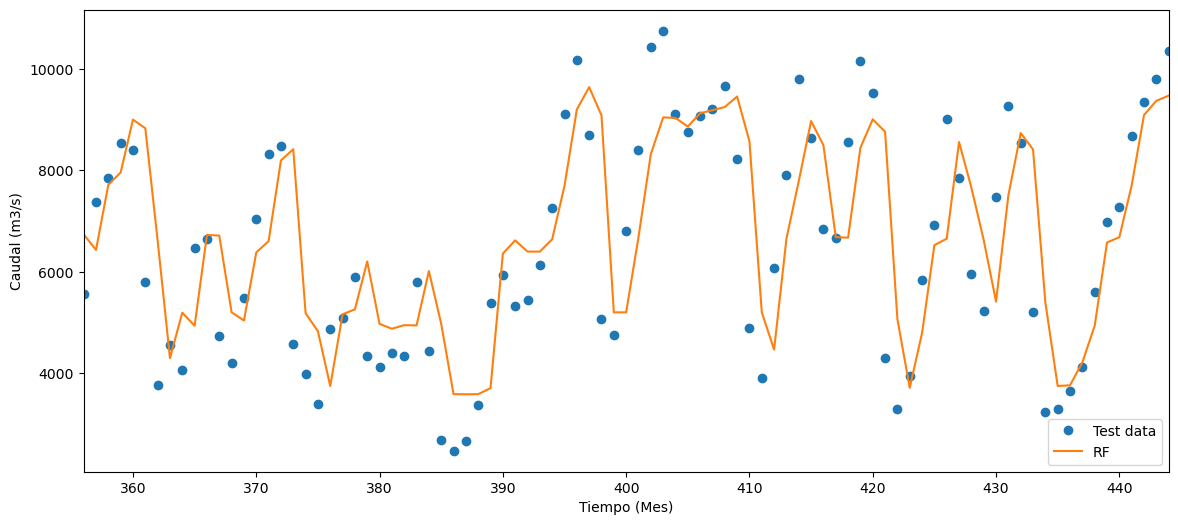

In [327]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data_test.Mes, y_test, marker='o', linestyle='', label="Test data")
plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y

plt.xlim(data_test.Mes.min(), data_test.Mes.max())

plt.show()

## k-NN regresor

In [328]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [329]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

In [330]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [331]:
param_grid = {'kneighborsregressor__n_neighbors': [1,2,4,6,8,10,15,20,30,40]}

In [332]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [1, 2, 4, 6, 8, 10,
                                                              15, 20, 30, 40]},
             scoring='r2')

In [333]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=15))])


In [334]:
y_pred = grid.predict(X_test)

In [335]:
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Training-set score: 0.66
Test-set score: 0.53


In [336]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1514.89
MAE: 1174.65
RRMSE: 0.23
R-squared (R^2): 0.53
NSE (Nash-Sutcliffe Efficiency): 0.53


## SVR

In [337]:
from sklearn.svm import SVR

In [338]:
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svr__epsilon': [0.001, 0.01,0.1, 0.2, 0.5, 1]
}

In [339]:
pipe = make_pipeline(MinMaxScaler(), SVR())

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svr__epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='r2')

In [340]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(C=100, epsilon=0.001))])


In [341]:
y_pred = grid.predict(X_test)

In [342]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1624.98
MAE: 1303.93
RRMSE: 0.25
R-squared (R^2): 0.46
NSE (Nash-Sutcliffe Efficiency): 0.46


## Redes Neuronales

In [343]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model

In [344]:
# Define el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


Epoch 1/200
3/3 [==============================] - 0s 36ms/step - loss: 42844240.0000 - val_loss: 47382072.0000
Epoch 2/200
3/3 [==============================] - 0s 10ms/step - loss: 30742990.0000 - val_loss: 31396980.0000
Epoch 3/200
3/3 [==============================] - 0s 10ms/step - loss: 20069602.0000 - val_loss: 18424000.0000
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 11606135.0000 - val_loss: 9000642.0000
Epoch 5/200
3/3 [==============================] - 0s 9ms/step - loss: 5741597.0000 - val_loss: 4130624.5000
Epoch 6/200
3/3 [==============================] - 0s 9ms/step - loss: 3036724.5000 - val_loss: 3858846.2500
Epoch 7/200
3/3 [==============================] - 0s 9ms/step - loss: 3421605.7500 - val_loss: 5919814.0000
Epoch 8/200
3/3 [==============================] - 0s 9ms/step - loss: 4682536.5000 - val_loss: 6519600.0000
Epoch 9/200
3/3 [==============================] - 0s 10ms/step - loss: 4779051.5000 - val_loss: 5353511.0000
Epoch 1

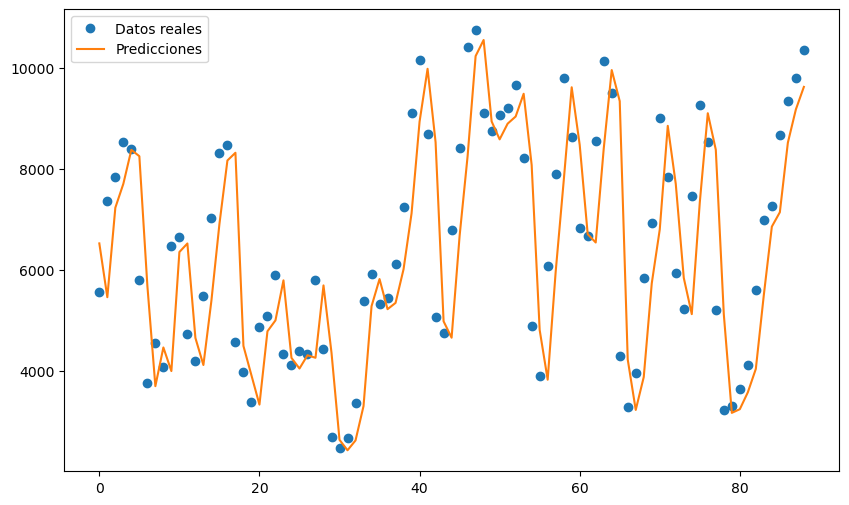

In [345]:
# Define el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

indice = int(0.8 * len(X_train))

X_trainval = X_train[:indice]
y_trainval = y_train[:indice]
X_val = X_train[indice:]
y_val = y_train[indice:]

scaler = MinMaxScaler()


model.fit(X_trainval, y_trainval, epochs=200,
                        batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])


# Evalúa el modelo en datos de prueba
y_pred = model.predict(X_test)
y_pred = y_pred.flatten().tolist()



# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()


In [346]:
metricas(y_test, y_pred)

RMSE: 1542.46
MAE: 1236.63
RRMSE: 0.24
R-squared (R^2): 0.51
NSE (Nash-Sutcliffe Efficiency): 0.51


## Modelo Hibrido


### Random Forest con modelos lineales 
Entre los modelos lineales se encuentran: autoregressive (AR), moving average (MA), and autoregressive moving average (ARMA)

Para medir el rendimiento de todos los modelos desarrollados de manera cualitativa, los valores de RRMSE (Error Cuadrático Medio Raíz Relativo) se categorizaron de la siguiente manera:
* Excelente: 0% < RRMSE < 10%
* Bueno: 10% < RRMSE < 20%
* Regular: 20% < RRMSE < 30%
* Malo: RRMSE > 30%


### AR-RF

In [347]:
residuales_test_lag = np.roll(residuales_AR, shift=1)
residuales_test_extra = np.column_stack((residuales_test_lag, X_test[:, 1]))
#residuales_test_extra = residuales_test_lag


Text(0, 0.5, 'Caudal (m3/s)')

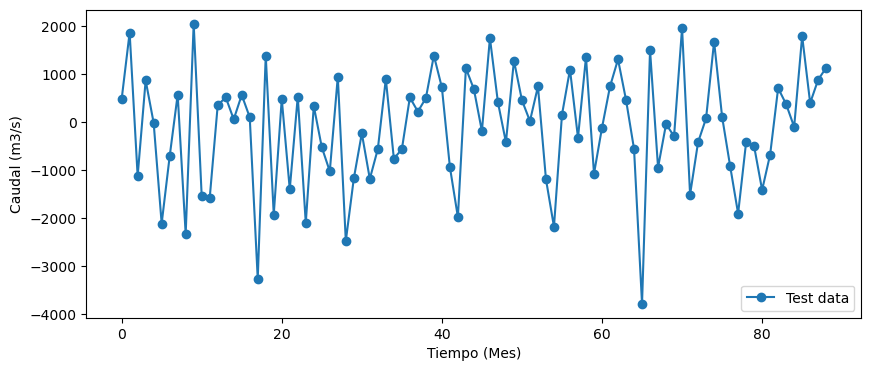

In [348]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_AR, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [349]:
best_order = orden_ar
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train[:, 1]))

Text(0, 0.5, 'Caudal (m3/s)')

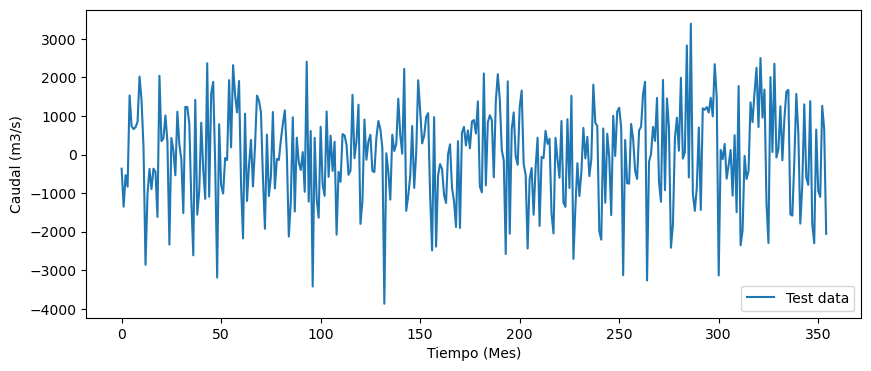

In [350]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



In [351]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [400],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF_e = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
RF_e.fit(residuales_train_extra, residuals_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [400]},
             scoring='r2')

In [352]:
print("Best estimator:\n{}".format(RF_e.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=2, max_leaf_nodes=6,
                                       min_samples_split=15,
                                       n_estimators=400))])


In [353]:
y_pred = RF_e.predict(residuales_test_extra)

In [354]:
"""plt.figure(figsize=(14,6))
plt.plot(residuals_train, label="Training data")
#plt.plot(residuales_AR, label="Test data")
plt.plot(y_tree, label="Tree prediction")
plt.legend();

"""

'plt.figure(figsize=(14,6))\nplt.plot(residuals_train, label="Training data")\n#plt.plot(residuales_AR, label="Test data")\nplt.plot(y_tree, label="Tree prediction")\nplt.legend();\n\n'

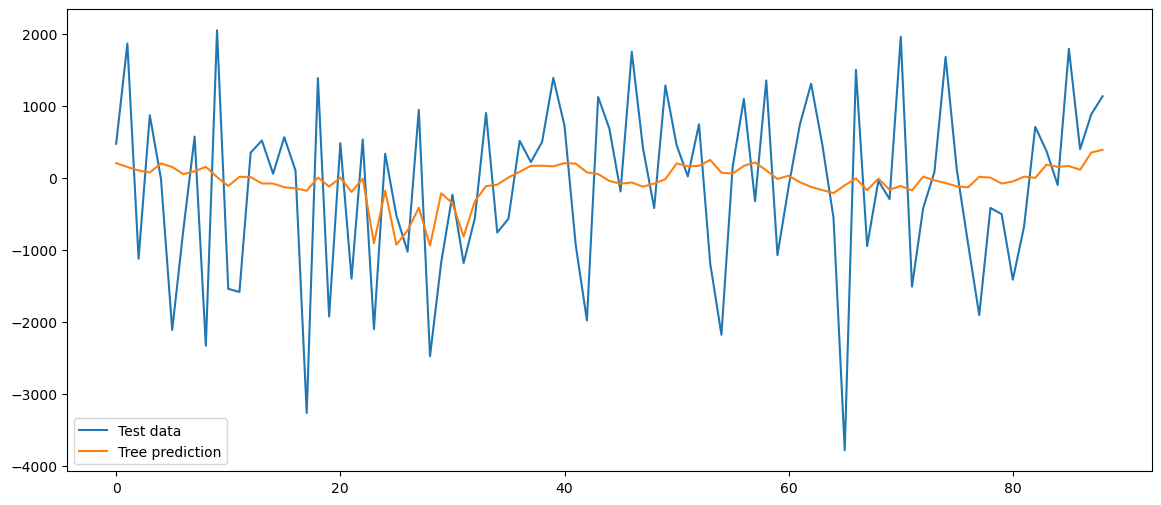

In [355]:
plt.figure(figsize=(14,6))
plt.plot(residuales_AR, label="Test data")
plt.plot(y_pred, label="Tree prediction")
plt.legend();


In [356]:
metricas(residuales_AR, y_pred)


RMSE: 1158.28
MAE: 906.35
RRMSE: -9.64
R-squared (R^2): 0.09
NSE (Nash-Sutcliffe Efficiency): 0.09


In [357]:
print("Training-set score: {:.2f}".format(RF_e.score(residuales_train_extra, residuals_train)))
print("Test-set score: {:.2f}".format(RF_e.score(residuales_test_extra, residuales_AR)))


Training-set score: 0.10
Test-set score: 0.09


In [358]:
y_residual = RF_e.predict(residuales_test_extra)

y_AR_RF = predictions_AR + y_residual


In [359]:
y_residual

array([ 207.66449928,  154.74417354,  105.93012027,   78.24147499,
        202.58557068,  154.53576782,   54.30979501,   94.2412036 ,
        156.74150847,   13.97192703, -110.86823938,   18.79306462,
         13.58991164,  -74.02883468,  -76.45100778, -127.12222416,
       -142.14515643, -176.17904596,    8.69899165, -118.29946188,
          6.10081348, -192.38536351,   -8.0279788 , -906.85689561,
       -174.09794452, -926.38949013, -729.08745279, -412.45411356,
       -939.01804426, -210.86498739, -349.18899433, -812.42418   ,
       -323.12891872, -112.35440771,  -91.65754597,    8.33845477,
         87.85320727,  170.06381002,  171.78488045,  162.89875591,
        208.27785877,  201.15447968,   79.87231996,   55.71137369,
        -40.08290257,  -78.67004461,  -60.82342836, -120.09534901,
        -75.58363917,  -14.91214384,  204.01577936,  162.89875591,
        170.31486946,  252.37075848,   75.51585182,   61.63751996,
        169.4423814 ,  217.77406245,  106.86752704,  -12.39780

In [360]:
print(y_residual)

[ 207.66449928  154.74417354  105.93012027   78.24147499  202.58557068
  154.53576782   54.30979501   94.2412036   156.74150847   13.97192703
 -110.86823938   18.79306462   13.58991164  -74.02883468  -76.45100778
 -127.12222416 -142.14515643 -176.17904596    8.69899165 -118.29946188
    6.10081348 -192.38536351   -8.0279788  -906.85689561 -174.09794452
 -926.38949013 -729.08745279 -412.45411356 -939.01804426 -210.86498739
 -349.18899433 -812.42418    -323.12891872 -112.35440771  -91.65754597
    8.33845477   87.85320727  170.06381002  171.78488045  162.89875591
  208.27785877  201.15447968   79.87231996   55.71137369  -40.08290257
  -78.67004461  -60.82342836 -120.09534901  -75.58363917  -14.91214384
  204.01577936  162.89875591  170.31486946  252.37075848   75.51585182
   61.63751996  169.4423814   217.77406245  106.86752704  -12.39780268
   33.00145951  -57.29885857 -122.95887425 -166.34721169 -209.74149727
 -100.38983305   -4.7313682  -168.48274657   -7.92152862 -160.52259211
 -110.

In [361]:
metricas(test, y_AR_RF)

RMSE: 1158.28
MAE: 906.35
RRMSE: 0.18
R-squared (R^2): 0.73
NSE (Nash-Sutcliffe Efficiency): 0.73


### ARMA-RF

In [362]:
residuales_test_lag = np.roll(residuales_ARMA, shift=1)
residuales_test_extra = np.column_stack((residuales_test_lag, X_test[:, 1]))

Text(0, 0.5, 'Caudal (m3/s)')

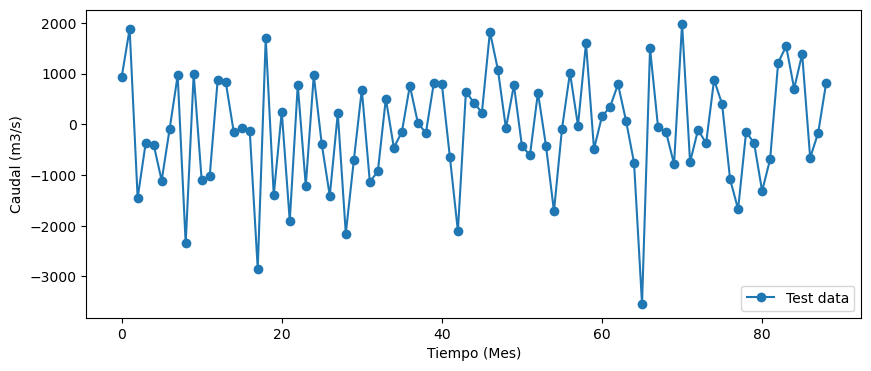

In [363]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_ARMA, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [364]:
best_order = orden_arma
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train[:, 1]))

Text(0, 0.5, 'Caudal (m3/s)')

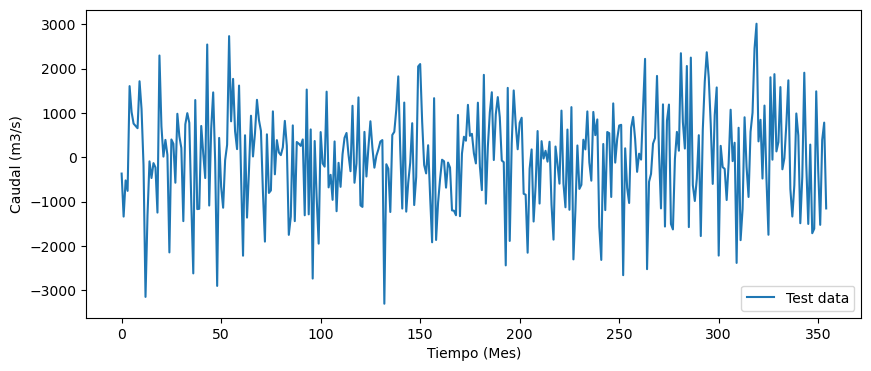

In [365]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



In [366]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [400],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF_e = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
RF_e.fit(residuales_train_extra, residuals_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [400]},
             scoring='r2')

In [367]:
print("Best estimator:\n{}".format(RF_e.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=2, max_leaf_nodes=6,
                                       n_estimators=400))])


In [368]:
y_pred = RF_e.predict(residuales_test_extra)

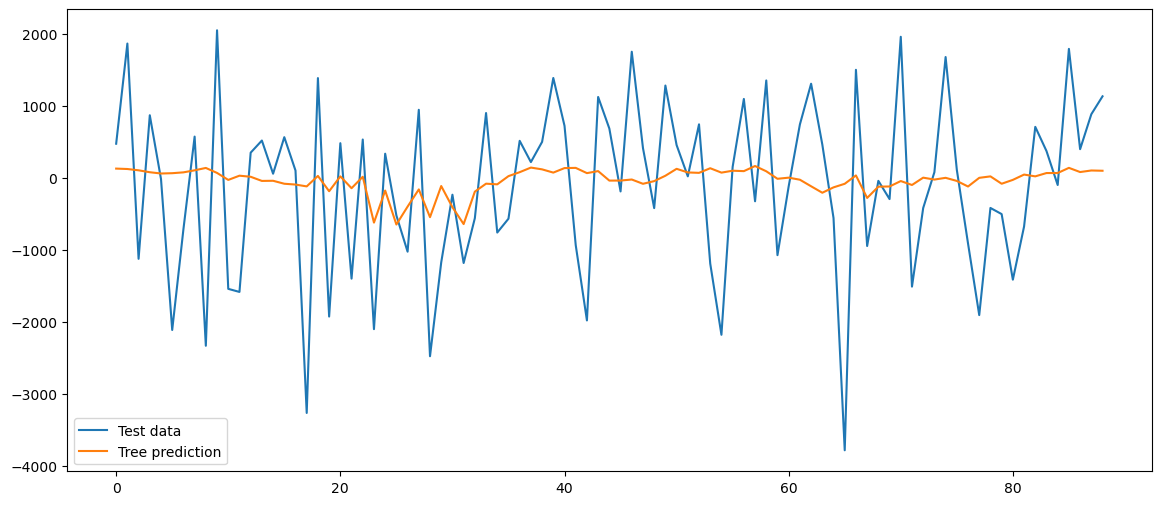

In [369]:
plt.figure(figsize=(14,6))
plt.plot(residuales_AR, label="Test data")
plt.plot(y_pred, label="Tree prediction")
plt.legend();


In [370]:
metricas(residuales_AR, y_pred)


RMSE: 1168.76
MAE: 919.88
RRMSE: -9.73
R-squared (R^2): 0.07
NSE (Nash-Sutcliffe Efficiency): 0.07


In [371]:
print("Training-set score: {:.2f}".format(RF_e.score(residuales_train_extra, residuals_train)))
print("Test-set score: {:.2f}".format(RF_e.score(residuales_test_extra, residuales_AR)))


Training-set score: 0.09
Test-set score: 0.07


In [372]:
y_residual = RF_e.predict(residuales_test_extra)

y_ARMA_RF = predictions_ARMA + y_residual


In [373]:
metricas(test, y_ARMA_RF)

RMSE: 1051.89
MAE: 831.62
RRMSE: 0.16
R-squared (R^2): 0.77
NSE (Nash-Sutcliffe Efficiency): 0.77


### AR-MODEL

Text(0, 0.5, 'Caudal (m3/s)')

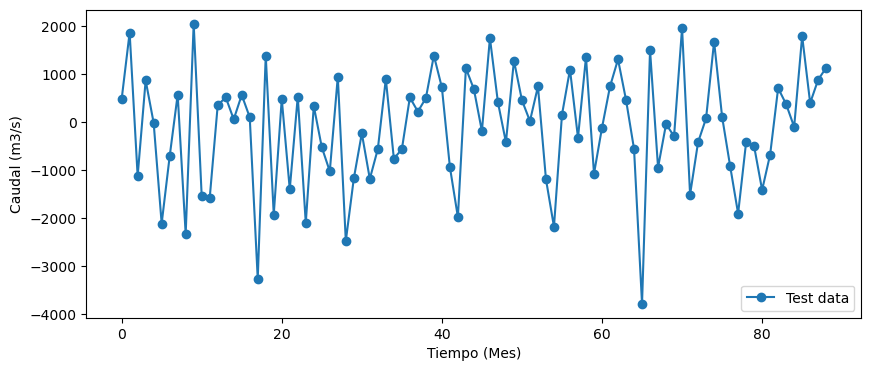

In [374]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_AR, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [375]:
best_order = orden_ar
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train[:, 1]))

Text(0, 0.5, 'Caudal (m3/s)')

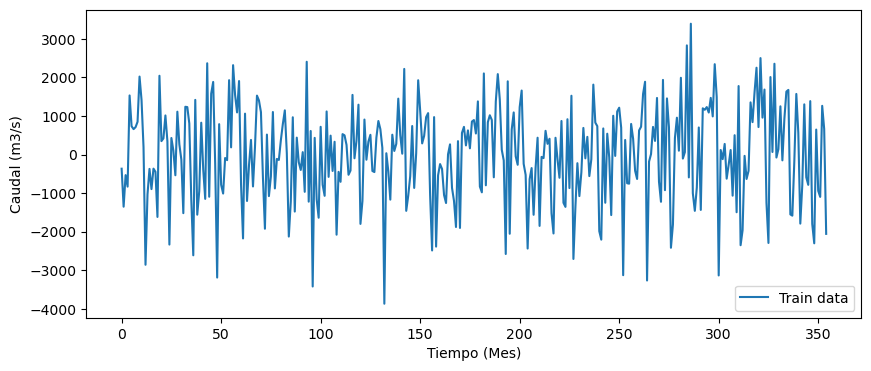

In [376]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, label="Train data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



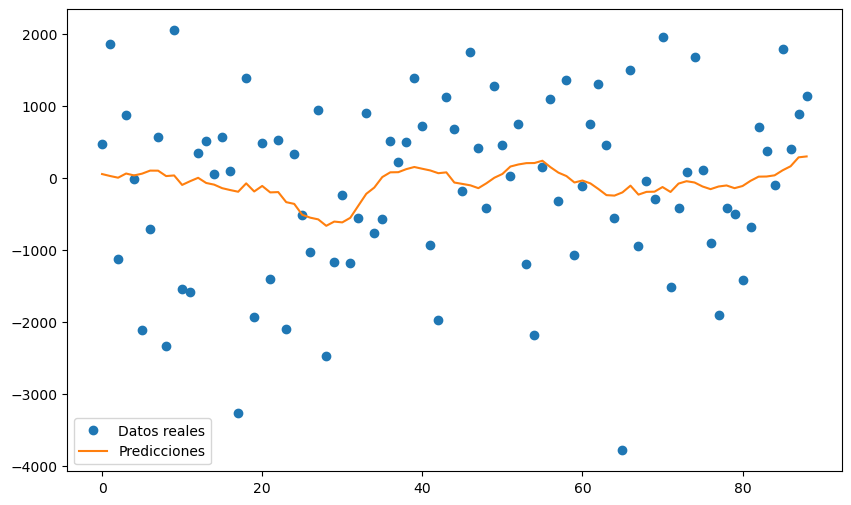

In [377]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a range of alpha values you want to test
alpha_values = np.logspace(-6, 6, 1000)  # Adjust as needed

# Create a pipeline with StandardScaler and Ridge regression
pipe = make_pipeline(MinMaxScaler(), Ridge())

# Define the parameter grid for the Ridge regression
param_grid = {'ridge__alpha': alpha_values}

# Create the GridSearchCV object
ridge_grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the model to your training data
ridge_grid.fit(residuales_train_extra, residuals_train)


# Evalúa el modelo en datos de prueba escalados
y_pred_ridge = ridge_grid.predict(residuales_test_extra)

# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(residuales_AR, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred_ridge, label='Predicciones')
plt.legend()
plt.show()



In [378]:
metricas(residuales_AR, y_pred_ridge)

RMSE: 1169.28
MAE: 919.99
RRMSE: -9.73
R-squared (R^2): 0.07
NSE (Nash-Sutcliffe Efficiency): 0.07


In [379]:

y_AR_Ridge = predictions_AR + y_pred_ridge

In [380]:
metricas(y_test, y_AR_Ridge)


RMSE: 1169.28
MAE: 919.99
RRMSE: 0.18
R-squared (R^2): 0.72
NSE (Nash-Sutcliffe Efficiency): 0.72


### ARMA-MODEL

Text(0, 0.5, 'Caudal (m3/s)')

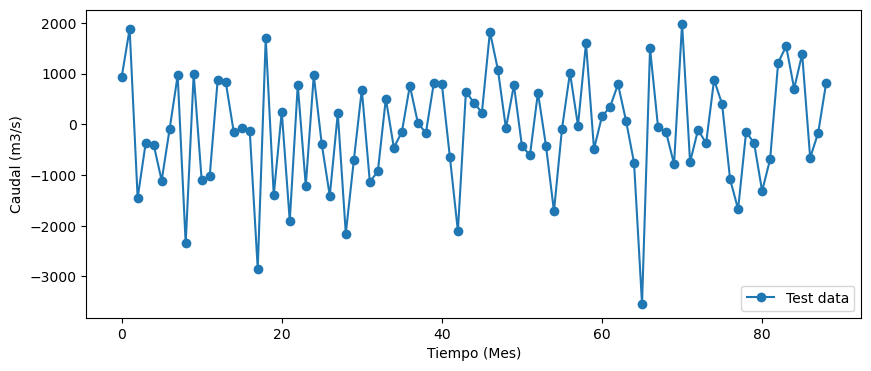

In [381]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_ARMA, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [382]:
best_order = orden_arma
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train[:, 1]))

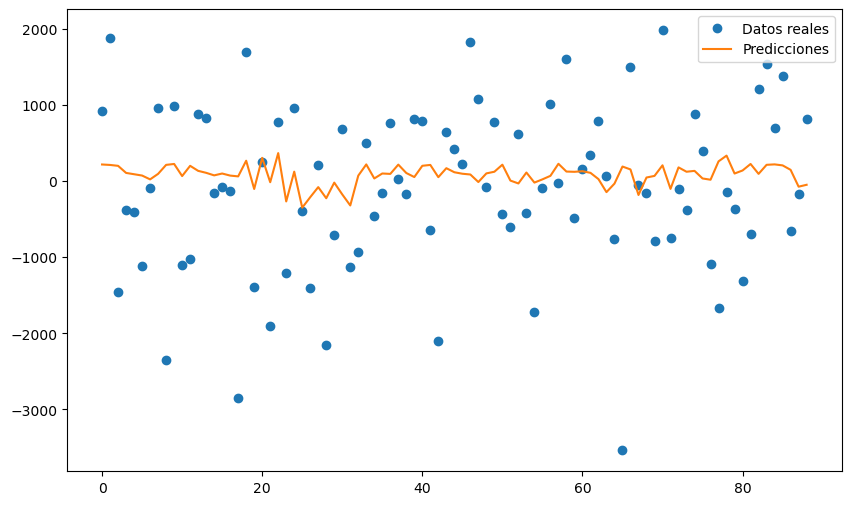

In [383]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a range of alpha values you want to test
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'svr__epsilon': [0.001, 0.01,0.1, 0.2, 0.5, 1, 2]
}
# Create a pipeline with StandardScaler and Ridge regression
pipe = make_pipeline(MinMaxScaler(), SVR())


# Create the GridSearchCV object
ridge_grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the model to your training data
ridge_grid.fit(residuales_train_extra, residuals_train)


# Evalúa el modelo en datos de prueba escalados
y_pred_ridge = ridge_grid.predict(residuales_test_extra)

# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(residuales_ARMA, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred_ridge, label='Predicciones')
plt.legend()
plt.show()



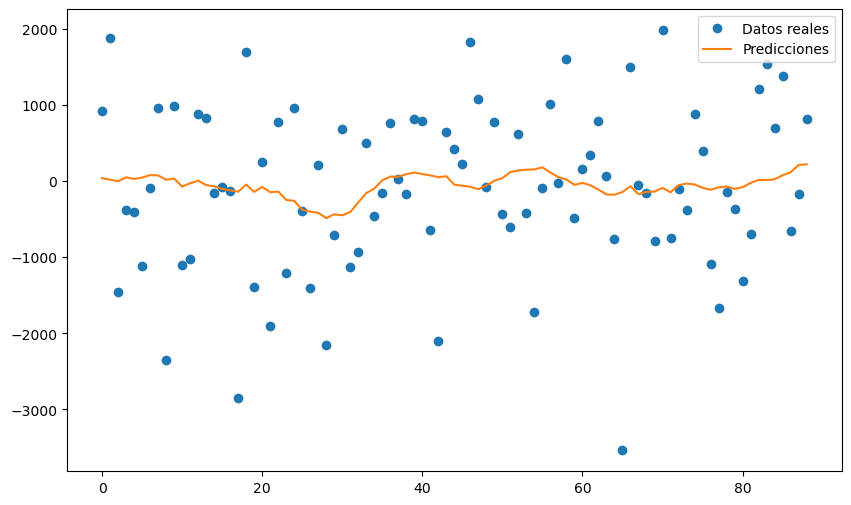

In [384]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a range of alpha values you want to test
alpha_values = np.logspace(-6, 6, 1000)  # Adjust as needed

# Create a pipeline with StandardScaler and Ridge regression
pipe = make_pipeline(MinMaxScaler(), Ridge())

# Define the parameter grid for the Ridge regression
param_grid = {'ridge__alpha': alpha_values}

# Create the GridSearchCV object
ridge_grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the model to your training data
ridge_grid.fit(residuales_train_extra, residuals_train)


# Evalúa el modelo en datos de prueba escalados
y_pred_ridge = ridge_grid.predict(residuales_test_extra)

# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(residuales_ARMA, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred_ridge, label='Predicciones')
plt.legend()
plt.show()



In [385]:
"""import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Define el modelo XGBoost Regressor
xgb_model = XGBRegressor()



# Define los hiperparámetros que deseas buscar utilizando GridSearchCV
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Create the GridSearchCV object
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the model to your training data
xgb_grid.fit(residuales_train_extra, residuals_train)

# Evaluate the model on scaled test data
y_pred_xgb = xgb_grid.predict(residuales_test_extra)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(residuales_ARMA, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred_xgb, label='Predicciones')
plt.legend()
plt.show()
"""


"import numpy as np\nfrom xgboost import XGBRegressor\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.preprocessing import MinMaxScaler\nimport matplotlib.pyplot as plt\n\n\n# Define el modelo XGBoost Regressor\nxgb_model = XGBRegressor()\n\n\n\n# Define los hiperparámetros que deseas buscar utilizando GridSearchCV\nparam_grid = {\n    'max_depth': range (2, 10, 1),\n    'n_estimators': range(60, 220, 40),\n    'learning_rate': [0.1, 0.01, 0.05]\n}\n\n# Create the GridSearchCV object\nxgb_grid = GridSearchCV(xgb_model, param_grid, scoring='r2', cv=5, n_jobs=-1)\n\n# Fit the model to your training data\nxgb_grid.fit(residuales_train_extra, residuals_train)\n\n# Evaluate the model on scaled test data\ny_pred_xgb = xgb_grid.predict(residuales_test_extra)\n\n# Plot the results\nplt.figure(figsize=(10, 6))\nplt.plot(residuales_ARMA, label='Datos reales', marker='o', linestyle='' )\nplt.plot(y_pred_xgb, label='Predicciones')\nplt.legend()\nplt.show()\n"

In [386]:
metricas(residuales_ARMA, y_pred_ridge)


RMSE: 1060.48
MAE: 835.47
RRMSE: -11.17
R-squared (R^2): 0.05
NSE (Nash-Sutcliffe Efficiency): 0.05


In [387]:

y_ARMA_NN = predictions_ARMA + y_pred_ridge


In [388]:
metricas(test, y_ARMA_NN)

RMSE: 1060.48
MAE: 835.47
RRMSE: 0.16
R-squared (R^2): 0.77
NSE (Nash-Sutcliffe Efficiency): 0.77
